In [6]:
import numpy as np
from PIL import Image
import scanpy as sc
from collections import Counter

In [7]:
# FILE = "datasets/10XGenomics/Targeted_SC3v3_Human_Glioblastoma_Neuroscience_filtered_feature_bc_matrix.h5"
FILE = "datasets/10XGenomics/Human_PBMCs_Next_GEM_Flex_GEM-X_Flex_Comparison_count_filtered_feature_bc_matrix.h5"

In [8]:
adata = sc.read_10x_h5(FILE)
X = adata.X.todense()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
def create_highlighted_image(array, target_number, size):
    height, width = size, size
    image = np.full((height, width, 3), 255, dtype=np.uint8)

    array = array[:size, :size]
    black_mask = (array != target_number)
    image[black_mask] = [0, 0, 0]
    red_mask = (array == target_number)
    image[red_mask] = [255, 0, 0]
    pil_image = Image.fromarray(image)
    pil_image.save(f"images2/test{str(target_number).zfill(2)}_{size}.png")
    return pil_image

In [10]:
X = np.array(X)

In [26]:
X[:50, :50].shape

(50, 50)

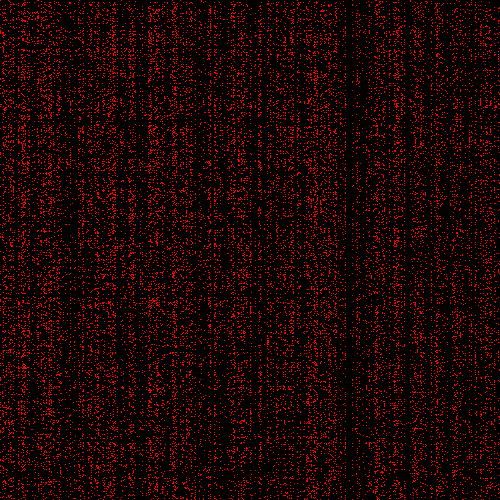

In [37]:
img = create_highlighted_image(X, 1, 500)
img

In [47]:
for x in range(1, 100):
    create_highlighted_image(X, x, 500)

In [11]:
c = Counter(X.flatten())
del c[0.0]

In [12]:
from matplotlib import pyplot as plt
from math import log

In [15]:
xs = []
ys = []
for i in range(1, int(max(c) + 1)):
    if i in c:
        xs.append(i)
        ys.append(log(c.get(i, 0)))

In [80]:
len(xs)

984

Text(0.5, 1.0, 'Log-log plot of counts of numbers')

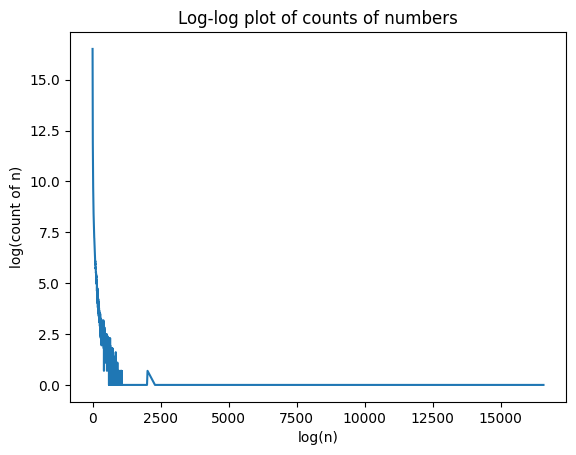

In [16]:
plt.plot(xs, ys)
plt.xlabel("log(n)")
plt.ylabel("log(count of n)")
plt.title("Log-log plot of counts of numbers")

In [4]:
from matplotlib import pyplot as plt
# plt.bar([1, 2, 3, 4, 5, 6], [5.9, 3.7, 3.4, 2.6, 2.2, 1.9])
# plt.bar([1, 2, 3, 4, 5, 6], [91.8, 55.5, 54.6, 54.2, 36.5, 27.5])
def bar(sizes):
    labels = ['mtx', 'csc', 'csr', 'loom', 'mine']
    colors = ['blue', 'green', 'purple', 'orange', 'red']
    x = [1, 2, 3, 4, 5]
    plt.bar(x, sizes, label=labels, color=colors)
    plt.legend()
    plt.ylabel("Gzipped Size (MBs)")

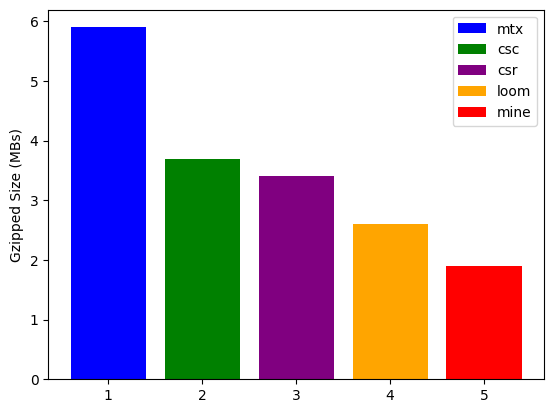

In [3]:
bar([5.9, 3.7, 3.4, 2.6, 1.9])

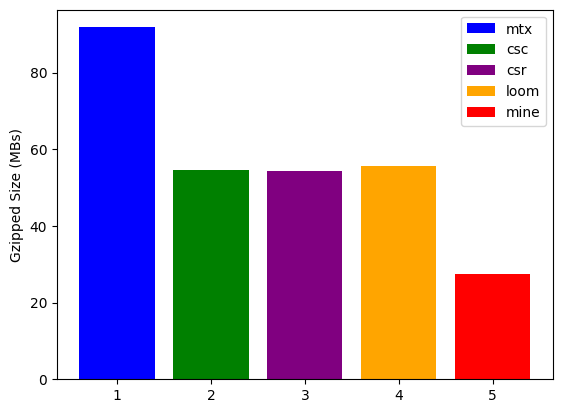

In [7]:
bar([91.8, 54.6, 54.2, 55.5, 27.5])

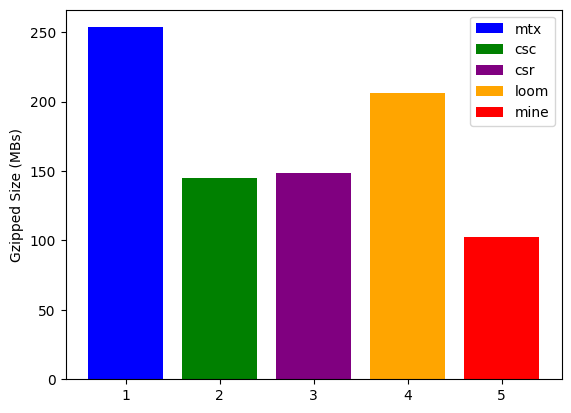

In [2]:
bar([253.53, 145.08, 148.45, 205.89, 102.4])

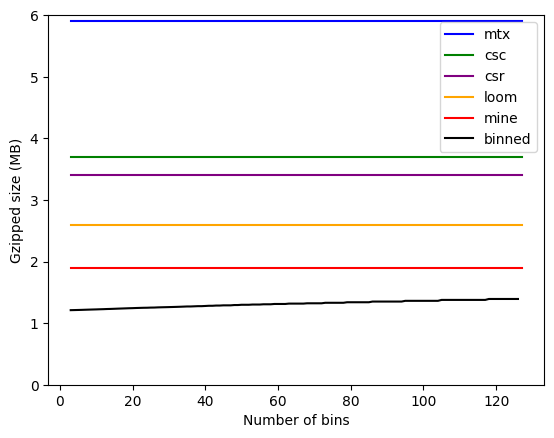

In [38]:
from matplotlib import pyplot as plt
# plt.bar([1, 2, 3, 4, 5, 6], [5.9, 3.7, 3.4, 2.6, 2.2, 1.9])
# plt.bar([1, 2, 3, 4, 5, 6], [91.8, 55.5, 54.6, 54.2, 36.5, 27.5])
def bar(sizes):
    labels = ['mtx', 'csc', 'csr', 'loom', 'mine']
    colors = ['blue', 'green', 'purple', 'orange', 'red']
    x = [1, 2, 3, 4, 5]
    plt.bar(x, sizes, label=labels, color=colors)
    plt.legend()
    plt.ylabel("Gzipped Size (MBs)")
# bar([5.9, 3.7, 3.4, 2.6, 1.9])
for a, b, c in zip([5.9, 3.7, 3.4, 2.6, 1.9], ['mtx', 'csc', 'csr', 'loom', 'mine'], ['blue', 'green', 'purple', 'orange', 'red']):
    plt.plot([3, 127], [a, a], label=b, color=c)
plt.plot(sizes.keys(), [i / 10000000 for i in sizes.values()], label='binned', color='black')
plt.ylim((0, 6))
plt.xlabel('Number of bins')
plt.ylabel('Gzipped size (MB)')
plt.legend()

In [20]:
sizes={3: 12104423,
 4: 12118692,
 5: 12134139,
 6: 12151637,
 7: 12172489,
 8: 12191549,
 9: 12209856,
 10: 12226891,
 11: 12248095,
 12: 12265458,
 13: 12289570,
 14: 12305494,
 15: 12327607,
 16: 12351563,
 17: 12372126,
 18: 12392815,
 19: 12415016,
 20: 12430919,
 21: 12454432,
 22: 12472181,
 23: 12489351,
 24: 12498431,
 25: 12520157,
 26: 12529006,
 27: 12555459,
 28: 12572128,
 29: 12586165,
 30: 12600916,
 31: 12617937,
 32: 12635903,
 33: 12655812,
 34: 12679103,
 35: 12703729,
 36: 12703729,
 37: 12729386,
 38: 12753135,
 39: 12753135,
 40: 12783518,
 41: 12815865,
 42: 12815865,
 43: 12852892,
 44: 12852892,
 45: 12886004,
 46: 12886004,
 47: 12886004,
 48: 12936076,
 49: 12936076,
 50: 12979656,
 51: 12979656,
 52: 12979656,
 53: 13016957,
 54: 13016957,
 55: 13016957,
 56: 13058038,
 57: 13058038,
 58: 13058038,
 59: 13108937,
 60: 13108937,
 61: 13108937,
 62: 13108937,
 63: 13168883,
 64: 13168883,
 65: 13168883,
 66: 13168883,
 67: 13168883,
 68: 13219422,
 69: 13219422,
 70: 13219422,
 71: 13219422,
 72: 13219422,
 73: 13301497,
 74: 13301497,
 75: 13301497,
 76: 13301497,
 77: 13301497,
 78: 13301497,
 79: 13388799,
 80: 13388799,
 81: 13388799,
 82: 13388799,
 83: 13388799,
 84: 13388799,
 85: 13388799,
 86: 13500235,
 87: 13500235,
 88: 13500235,
 89: 13500235,
 90: 13500235,
 91: 13500235,
 92: 13500235,
 93: 13500235,
 94: 13500235,
 95: 13618779,
 96: 13618779,
 97: 13618779,
 98: 13618779,
 99: 13618779,
 100: 13618779,
 101: 13618779,
 102: 13618779,
 103: 13618779,
 104: 13618779,
 105: 13768920,
 106: 13768920,
 107: 13768920,
 108: 13768920,
 109: 13768920,
 110: 13768920,
 111: 13768920,
 112: 13768920,
 113: 13768920,
 114: 13768920,
 115: 13768920,
 116: 13768920,
 117: 13768920,
 118: 13920405,
 119: 13920405,
 120: 13920405,
 121: 13920405,
 122: 13920405,
 123: 13920405,
 124: 13920405,
 125: 13920405,
 126: 13920405}
